<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 24s 2us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

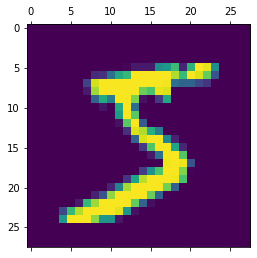

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

NameError: name 'X_train' is not defined

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4900 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3070 - accuracy: 0.91 - 2s 1ms/step - loss: 0.3062 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9263


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 741us/step - loss: 0.2685 - accuracy: 0.9261


[0.2684920132160187, 0.9261000156402588]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.20647455e-05, 9.32695310e-11, 7.04658160e-05, 9.77498293e-03,
       1.15462740e-06, 9.61730839e-05, 1.49123691e-09, 7.94275284e-01,
       5.17851950e-05, 9.58055258e-04], dtype=float32)

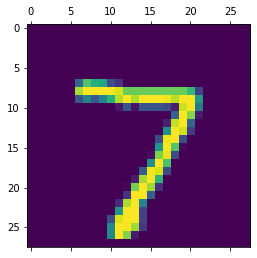

In [ ]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    6,    8,    3,    2,    0],
       [   0, 1109,    6,    1,    0,    1,    3,    2,   13,    0],
       [   3,    5,  954,   13,    7,    4,   11,   11,   19,    5],
       [   2,    0,   28,  919,    0,   24,    2,   13,   15,    7],
       [   1,    1,    6,    1,  907,    0,    9,    4,    7,   46],
       [   7,    2,    8,   31,    9,  785,    9,    6,   28,    7],
       [   6,    3,   11,    1,    8,   16,  909,    2,    2,    0],
       [   1,    5,   28,    4,    5,    0,    0,  951,    1,   33],
       [   6,    6,   11,   27,    9,   37,    9,   14,  843,   12],
       [   7,    6,    2,   11,   18,    8,    0,   25,    5,  927]])>

Text(69.0, 0.5, 'Truth')

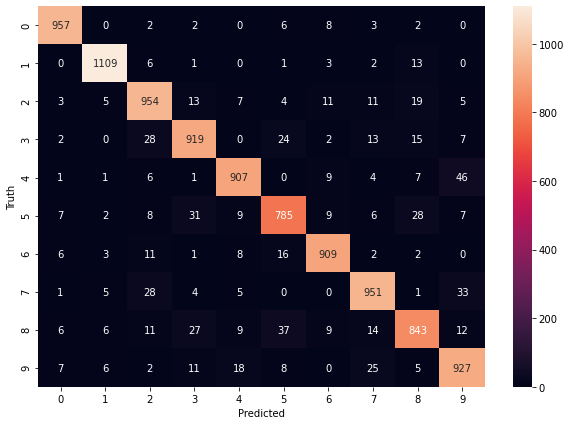

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3028 - accuracy: 0.9165
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1028 - accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0819 - accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9797


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9707


[0.09895123541355133, 0.9707000255584717]

Text(69.0, 0.5, 'Truth')

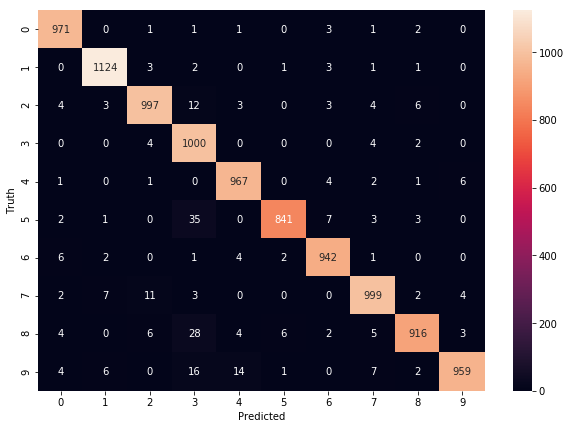

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1393 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1004 - accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.025

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1000us/step - loss: 0.0828 - accuracy: 0.9782


[0.08284460008144379, 0.9782000184059143]